# Lec3-pre Homework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Question 1

In [2]:
#1. This is the first part of the assignment, writting a Fibonnaci Sequence with memoization, and the
#comparing F(n)/F(n+1) into a graph

#This is where the numbers will be stored
numbers = [None]*(101)
def memo(n, table):
    if n == 0 or n == 1:
        table[n] = n
    
    if table[n] == None:
        table[n] = memo(n-1, table) + memo(n-2, table)
        
    return table[n]

memo(100, numbers)

354224848179261915075

In [3]:
if len(numbers) == 101:
    print("Hello")
    numbers = numbers[1:] #Don't need to save 0

Hello


In [4]:
dom = np.arange(1,100,1) #I want to make a domain for the plot

In [5]:
rang = list(); #This will be the range of the plot
for i in dom:
    rang.append(numbers[i]/numbers[i-1]) #This is the ration I will be plotting

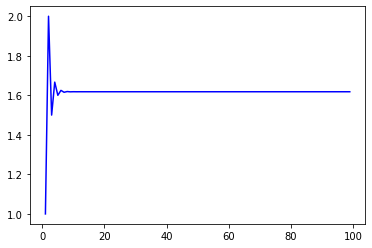

In [6]:
#Will make the plot here
plt.plot(dom, rang, "b-") #I just want to make it a blue line
plt.show()

# Question 2

### Recursive Method

#### --Method Declaration--

In [8]:
#2. This is the second part of the assignment, building the fibonacci sequence with other methods, 
#and seeing how they work

#This will be the recursive method
def recurseFib(n):
    if n == 1:
        return 1
    elif n == 0:
        return 0
    else:
        return recurseFib(n-1) + recurseFib(n-2)

#### --Timing Calculation--

In [9]:
#Run a timer for different n values
"""tic = time.perf_counter()
ans = recurseFib(40)
toc = time.perf_counter()
print(f"{toc-tic:0.4f}")
print(ans)"""
import sys

times = dict() #This is the dictionary that will hold the times
"""for i in np.arange(1, 43, 3):
    #Start timing the process
    
    ans = recurseFib(i) #This will just hold the return
    
    times[str(i)] = toc - tic #Find the difference in time
    print("Finished " + str(i))"""

for i in np.arange(1, 43, 3):
    tic = time.time()
    ans = recurseFib(i)
    times[str(i)] = time.time() - tic
    if i < 43:
        sys.stdout.write("finished " + str(i) + "\r")
        sys.stdout.flush()
        
print()
print("Done")
    
    
    
#I don't think my computer can handle 2^n where n is 100, I just uses all available memory and doesn't finish

finished 40
Done


#### --Save and Graph--

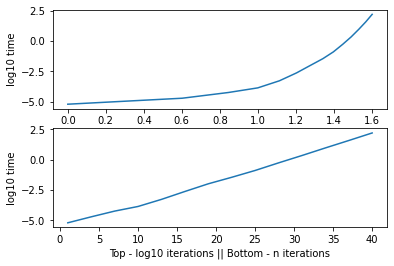

In [10]:
#So everything has been calculated, save to a file specifically for recursive .txt
#save the iteration and time pairs into a folder
with open("./output_hw3/recursive.txt", "w") as file:
    file.write("Recursive Method\n")
    for i in times.keys():
        file.write(i + "\t" + str(times[i]) + "\n") #write these numbers to a file

#This will be the x and y array that will be used in the plot
x = list()
y = list()
x2 = list() #I just want to save recursive as an int

#read from the file
with open("./output_hw3/recursive.txt", "r") as file:
    line = file.readline() #read a line
    while line:
        if line.split()[0] != "Recursive": #read everything but the Header
            x.append(np.log10(int(line.split()[0]))) #find the base-10 log of the iterations
            x2.append(int(line.split()[0])) #just save the numerical iterations
            y.append(np.log10(float(line.split()[1]))) #convert the time back to a float
        line = file.readline()
        
#plot the graph
"""plt.plot(x, y)
plt.ylabel("log10 time")
plt.xlabel("log10 iterations")"""
plt.figure(1)
plt.subplot(211)
plt.plot(x, y)
plt.ylabel("log10 time")
plt.subplot(212)
plt.plot(x2, y)
plt.ylabel("log10 time")
plt.xlabel("Top - log10 iterations || Bottom - n iterations")
plt.show()

#### --Complexity Analysis--

Without graphing the ouptut, it can be shown that the recursive method for the Fibonacci sequence is of a complexity: O($2^n$)

This is because with every recursion downwards, two more recursive function calls are made. That's of order $2^n$, and that can be seen in the graph $log(time)$ agains n (iterations)

### Matrix Method

#### --Method Declarations--

In [11]:
#This is the matrix method
#starting = np.array([[1,1],[1, 0]]) #The answers are different if they are
#used in a numpy array
starting = [[1,1],[1,0]]

#This is ripped directly from the lecture, I rewrote it below, and I want to use that for the timing
"""def inClassMatrix(arr, n):
    yarr = arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = matrix(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr"""

#I just rewrote the same code as above, but I used np.array and np.matmul
#which allow multidimensional arrays to act as matrixes to solve the problem
def matrix(arr, n):
    yarr = arr
    #This check is so see if we need to recurse down further
    if n<1:
        print('n needs to be larger than 1')
        return
    if n==1:
        return arr
    yarr = matrix(arr, n//2) #recurse down further if you need too
    yarr = np.matmul(yarr, yarr) #multiply the newly found matrixes together
    
    #If it's odd, do it again to account for the array that was lost in the recursion
    if n % 2:
        yarr = np.matmul(yarr, arr)
        
    return yarr

#### --Timing Calculation--

In [12]:
times = dict() #This is the dictionary that will hold the times

i = 1
while i < 10**6:
    arr = np.array([[1,1],[1,0]]) #Restart the array that will hold the answer
    arr = arr.astype(np.object) #I need to transform this into a numpy array that isn't int32
    tic = time.perf_counter() #begin counter
    matrix(arr, i - 1) #calcualte the iteration
    toc = time.perf_counter() #finish counter
    times[str(i)] = toc - tic #save time
    i *= 10

print("Finished calculating matrix method")

#print(compare(np.matrix("1 1: 1 0", dtype=np.object)**100, 100-1)[0][0])
#This is a one-line method I saw that does the same thing
#print((np.matrix("1 1; 1 0", dtype=np.object)**100).item(1)) 

n needs to be larger than 1
Finished calculating matrix method


#### --Save and Graph--

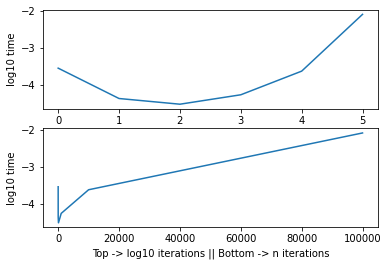

In [13]:
#So everything has been calculated, save to a file specifically for matrix .txt
#save the iteration and time pairs into a folder
with open("./output_hw3/matrix.txt", "w") as file:
    file.write("Matrix Method\n")
    for i in times.keys():
        file.write(i + "\t" + str(times[i]) + "\n") #write these numbers to a file

#This will be the x and y array that will be used in the plot
x = list()
y = list()
x2 = list()

#read from the file
with open("./output_hw3/matrix.txt", "r") as file:
    line = file.readline() #read a line
    while line:
        if line.split()[0] != "Matrix": #read everything but the Header
            x.append(np.log10(int(line.split()[0]))) #find the base-10 log of the iterations
            x2.append(int(line.split()[0]))
            y.append(np.log10(float(line.split()[1]))) #convert the time back to a float
        line = file.readline()
        
#plot the graph
plt.figure(1)
plt.subplot(211)
plt.plot(x, y)
plt.ylabel("log10 time")
plt.subplot(212)
plt.plot(x2, y)
plt.ylabel("log10 time")
plt.xlabel("Top -> log10 iterations || Bottom -> n iterations")
plt.show()

#### --Complexity Analysis--

The complexity in this graph of $log(time)$ against $log(n)$ (iterations) looks like a quadratic graph. Therefore

$log(time)$ = $(log(n))^2$

time = $10^k$ where k = $(log(n))^2$

time = n^2

This follows a quadtractic complexity $O(n^2)$. Though the graph of $log(time)$ against n iterations shows a exponential decay.

### Tabulation Method

#### --Method Declaration & Timing Calculation--

In [14]:
#This is the tabulation method
table = [1,1] #This table will store the newest calculated value in the sequence
def tabulated(n, table):
    value = 0
    #for loop in the range of the n-2, because the table already accounts for 2 numbers
    for i in range(n-2):
        value = table[0] + table[1] #add the previous two numbers
        
        #shift the table, so the newest value is the last element
        table[0] = table[1]
        table[1] = value
        
    return value

times = dict() #create a dictionairy, this will store the times

i = 1
#goes from 1 to 10^6
while i <= 10**6:
    table = [1,1]
    tic = time.perf_counter()
    tabulated(i, table) #calculate the tabulation method
    toc = time.perf_counter()
    times[str(i)] = toc-tic #find the time that has elapsed
    i *= 10 #increment

print("Finished calculating tabulation method")

Finished calculating tabulation method


#### --Save and Graph--

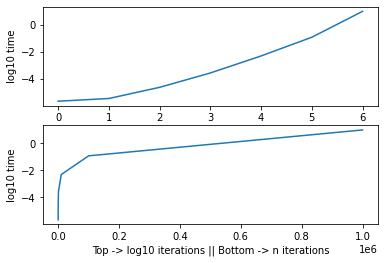

In [15]:
#save the iteration and time pairs into a folder
with open("./output_hw3/tabulation.txt", "w") as file:
    file.write("Tabulation Method\n")
    for i in times.keys():
        file.write(i + "\t" + str(times[i]) + "\n") #write these numbers to a file

#This will be the x and y array that will be used in the plot
x = list()
y = list()
x2 = list()

#read from the file
with open("./output_hw3/tabulation.txt", "r") as file:
    line = file.readline() #read a line
    while line:
        if line.split()[0] != "Tabulation": #read everything but the Header
            x.append(np.log10(int(line.split()[0]))) #find the base-10 log of the iterations
            x2.append(int(line.split()[0]))
            y.append(np.log10(float(line.split()[1]))) #convert the time back to a float
        line = file.readline()

#plot the graph
plt.figure(1)
plt.subplot(211)
plt.plot(x, y)
plt.ylabel("log10 time")
plt.subplot(212)
plt.plot(x2, y)
plt.ylabel("log10 time")
plt.xlabel("Top -> log10 iterations || Bottom -> n iterations")
plt.show()

#### --Complexity Analysis--

The complexity of this method of the fibonacci sequence seems to be quadratic. The graph shows $log(time)$ against $log(n)$ (iterations), and this graph follows what looks like a line. Therefore

$log(time)$ = c*$log(n)$

time = $10^k$ where k = $log(n^c)$

time = $n^c$

where c is a constant. Therefore the complexity is $O(n^c)$ or $O(n^2)$ because of the binary nature of computers.

Though, funny enough, graphing it with $log(time)$ against n, it looks like an exponential decay